#WH spam strategy

Each player spams `Wormhole (WH)` as fast as possible.  
After all WHs have been used, all players move to a brand new game.  
They should now be able to purchase more `WHs` than the previous game. 

##### All this doesn't take into account levels from killing mobs


The strategy exploits the following flaws:
* growth created by more than 1000 active players
* growth by jumping 10 levels at every 100th level

Both flaws result in the player having more badge points to spend the next game as result of reaching a higher max level.

$$\text{badge points} = \text{max level} : 10$$

$$\text{number of wormholes} = \lfloor\text{badge points} \div 100\rfloor$$

We can calculate the number `WHs` we will have after N games, given the number of active players, and number of `WHs` per player at the start.


$$
\text{wormholes at start} 
\times
(\frac{\text{number of active players}}{1000} + \frac{\text{number of active players}}{10000})^{\text{Nth game}-1} = \text{number of wormholes at Nth game}
$$

Let's calculate the number `WHs` each player will have at the start of the second game, given 1000 active players and 10 `WHs` each for the first game.

$$
10
\times
(\frac{1000}{1000} + \frac{1000}{10000})^{2-1} = 11
$$
$$
10
\times
(1+0.1)^1 = 11
$$

Now with 1500 active players.

$$
10
\times
(\frac{1500}{1000} + \frac{1500}{10000})^{1} = 16.5
$$

What about 10th game?

$$
10
\times
(\frac{1500}{1000} + \frac{1500}{10000})^{10-1} = 906.47
$$

Let's plot this to visualize it better.

In [1]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
n_wormholes = 10
n_games = 20

def calc(n_active, n_game, multiplier=1.0):
    return n_wormholes * multiplier *(n_active/1000.0 + n_active/10000.0)**(n_game-1)

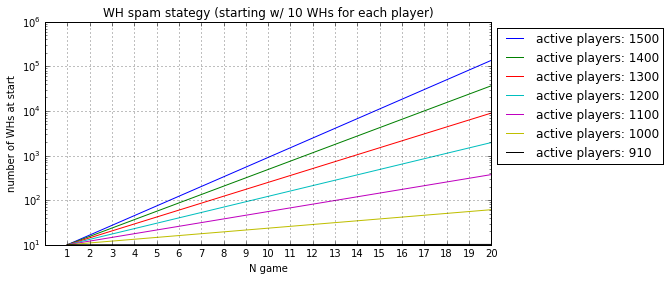

In [3]:
title = "WH spam stategy (starting w/ %d WHs for each player)" % n_wormholes

plt.figure(figsize=(8,4), dpi=72, facecolor='w')
plt.title(title)

x =  range(1,n_games + 1)

for n_active in reversed([910] + range(1000,1600,100)):
    y = map(lambda i: calc(n_active, i), x)
    plt.plot(x, y, label='active players: %d' % n_active)

plt.yscale('log')    
plt.ylabel("number of WHs at start")
plt.xlabel("N game")
plt.xticks(x)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.grid(True)
plt.show()

That's crazy and great, but remember WH has 60s cooldown.

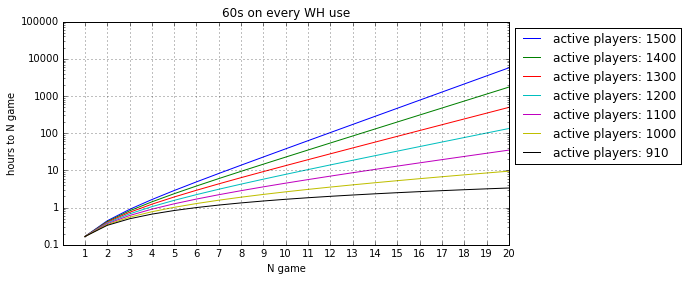

In [4]:
plt.figure(figsize=(8,4), dpi=72, facecolor='w')

for n_active in reversed([910] + range(1000,1600,100)):
    y = map(lambda i: (calc(n_active, i)) / 60, x)
    total = sum(y)
    for i, n in reversed(list(enumerate(y))):
        total, y[i] = total - y[i], total
        
    plt.plot(x, y, label='active players: %d' % n_active)

plt.title("60s on every WH use")
plt.ylabel('hours to N game')
plt.yscale('log')
plt.yticks(map(lambda x: 10**x, range(-1,6)), map(lambda x: 10**x, range(-1,6)))
plt.xlabel("N game")
plt.xticks(x)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.grid(True)
plt.show()

Nobody has that kind of time. Fortunatelly, there is `Like New (LN)` ability which resets all cooldowns in the current lane. If we spend say 10% of our badges towards `Like New (LN)` and activate it based on a chance, we can remove a large portions of those 60s cooldowns on wormholes. This in turn should send us climbing at warp speed.

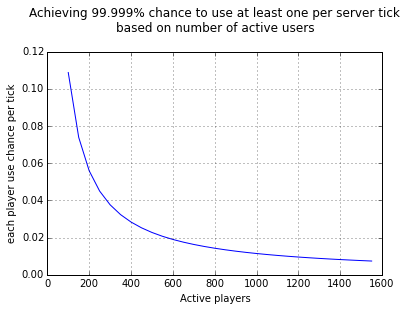

In [5]:
chance_one_per_tick = 0.99999

x2 = range(100,1600,50)
y2 = map(lambda n_actives: 1-((1-chance_one_per_tick) ** (1.0/n_actives)), x2)

title = "Achieving %0.3f%% chance to use at least one per server tick" % (chance_one_per_tick * 100.0)
title += "\nbased on number of active users\n"
plt.title(title)

plt.plot(x2, y2)
plt.ylabel("each player use chance per tick")
plt.xlabel("Active players")
plt.grid(True)
plt.show()

Based on the ladderboard and this graph, using `0.10` should give us good results for lone wolves. When chosing this value, we should consider the ratio of `WHs` to `LNs` we use for buying badges and adjust accordingly. We could buy less `LNs` and have a lower chance in order to minimize the `LH` overlap. Having more overlap could potentially result in faster stacking of `WHs`.

In conclusion, WH stategy is extremely overpowered if executed correctly.

## Ideal strategy

Using the `10` times multiplier from `Gold Helm` level, this is the ideal candidate to spam as many black holes as possible. All players end up in the same lane, which makes `LNs` use much more effective. Combined with the stacking `LHs` this could result in huge leaps. Ideally, DPS should be low on `Gold Helm` levels to allow as many as possible `WHs` uses.